# DU Level 1: Harnessing Big Data to Decode Cancer Biochemistry


In modern biomedical research, big data has transformed how we study cancer, offering unprecedented insights into the genetic and molecular mechanisms driving disease. Big data refers to vast, complex datasets that are too large for traditional methods to process efficiently. In cancer research, this includes genomic sequencing, transcriptomic profiles, and structural variations across thousands of cancer cell lines.

Cancer cell lines—populations of tumor-derived cells that can be cultured indefinitely—serve as powerful models for studying how mutations reshape gene expression. Each cell line carries distinct genetic alterations that influence transcription, the process by which genes are converted into RNA. These transcriptional shifts can activate oncogenes, silence tumor suppressors, or rewire cellular pathways, ultimately driving cancer progression.

By integrating computational tools like Python, we can systematically analyze these large-scale datasets to uncover fundamental biochemical relationships between genetic mutations, CNVs (copy number variations), and transcriptional changes. This approach enables researchers to map out how genomic alterations influence gene expression, identify potential drug targets, and accelerate discoveries in precision oncology.

## Setting Up the Environment & Import Data

Before we start working with the data, we need to set up the environment by importing essential libraries and configuring display options. This will help us view the entire dataset and relevant visualizations comfortably.

In [7]:
# Using IPython.display, we can modify the appearance of the Jupyter Notebook layout to better fit the content on the screen.

#This snippet adjusts the width of the notebook container, menu bar, and toolbar for a better viewing experience.

from IPython.display import clear_output
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# Import necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle

The following commands ensure that all columns and rows of a DataFrame are visible when printed, which is especially helpful when dealing with large datasets.


In [8]:
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.max_rows', None)

__________________

# 1.0 Exploring the Human Genome with UCSC Genome Browser Data

The UCSC Genome Browser is a powerful tool that provides access to a wealth of genomic information, including gene annotations, sequence variations, and structural features of the human reference genome. This browser allows researchers to explore how genes are organized, where mutations occur, and how genomic elements interact to regulate transcription.

In this lesson, we will work with genome.csv, a dataset downloaded from the UCSC Genome Browser. This file contains detailed annotations of the human genome, including information on genes, chromosomal locations, exon-intron structures, and other genomic features. By analyzing this dataset, we can investigate how mutations, copy number variations (CNVs), and gene locations influence transcription and disease progression.

🔗 Useful UCSC Genome Browser Links
UCSC Genome Browser: https://genome.ucsc.edu/
Downloads & Public Data: http://hgdownload.soe.ucsc.edu/downloads.html
Table Browser (for custom dataset queries): https://genome.ucsc.edu/cgi-bin/hgTables
We'll start by reading in genome.csv and exploring its structure before using Python to extract meaningful insights from the data.

In [9]:
# gene to chromosome mapping
genome = pd.read_csv('genome.csv')


/var/folders/4h/yz28dv_s7qz7td7d4d2sjzb80000gn/T/ipykernel_14134/322572814.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  genome = pd.read_csv('genome.csv')


In [10]:
genome.head(2)

,#chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,symbol,geneName,locus_group,locus_type,status,location,location_sortable,alias_symbol,alias_name,prev_symbol,prev_name,gene_group,gene_group_id,date_approved_reserved,date_symbol_changed,date_name_changed,date_modified,entrez_id,ensembl_gene_id,vega_id,ucsc_id,ena,refseq_accession,ccds_id,uniprot_ids,pubmed_id,mgd_id,rgd_id,lsdb,cosmic,omim_id,mirbase,homeodb,snornabase,bioparadigms_slc,orphanet,pseudogeneOrg,horde_id,merops,imgt,iuphar,kznf_gene_catalog,mamitTrnadb,cd,lncrnadb,enzyme_id,intermediate_filament_db,rna_central_ids,lncipedia,gtrnadb,agr,mane_select,gencc
0,chr1,11873,14408,HGNC:37102,0,+,0,0,"253,66,253",DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),pseudogene,pseudogene,Approved,1p36.33,01p36.33,NaN,NaN,NaN,DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 1...,NaN,NaN,2010-02-03,NaN,2020-02-17,2020-04-20,100287102,ENSG00000223972,OTTHUMG00000000961,NaN,AM992871,NR_046018,NaN,NaN,19476624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:37102,NaN,NaN
1,chr1,14361,29369,HGNC:38034,0,+,0,0,"253,66,253",WASH7P,"WASP family homolog 7, pseudogene",pseudogene,pseudogene,Approved,1p36.33,01p36.33,FAM39F,"family with sequence similarity 39, member F",NaN,"WAS protein family homolog 7, pseudogene",Wiskott-Aldrich Syndrome protein family,14,2010-03-23,NaN,2019-02-15,2019-02-15,653635,ENSG00000227232,OTTHUMG00000000958,NaN,NaN,NR_024540,NaN,NaN,18159949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGOHUM00000306540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HGNC:38034,NaN,NaN


Let's look at some key variables in the dataset.

## 🔬 Understanding the Features in Our Dataset  

The `genome.csv` file contains important details about genes and their locations in the human genome. Below are some key columns that will help us analyze genomic data:  

📌 **ChromStart**  
&nbsp;&nbsp;&nbsp;&nbsp;➡ The starting position of a gene on a chromosome, measured in **base pairs (bp)**. This tells us where a gene begins in the genome.  

📌 **Symbol**  
&nbsp;&nbsp;&nbsp;&nbsp;➡ The official **shorthand name** for a gene. For example, **TP53** is the symbol for the tumor suppressor gene *tumor protein p53*.  

📌 **Locus_group**  
&nbsp;&nbsp;&nbsp;&nbsp;➡ A category that describes the **type of genomic region**. It can indicate:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;✅ A functional gene  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;✅ A **pseudogene** (a non-functional gene copy)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;✅ Other genomic elements  

These features help us understand **where genes are located**, how they vary across samples, and how mutations may impact transcription. 🚀  

Hint: You can access the different types of genes by using the following function: 

In [11]:
genome.locus_group.unique()

array(['pseudogene', 'non-coding RNA', 'protein-coding gene', 'other'],
      dtype=object)

## 📌 Exercise: Exploring the Genome Dataset  

### **🔎 Try on Your Own**  

You may use the functions from **DE-1** to help with this exploration.  

Let's analyze the **genome dataset** and investigate key gene properties.  

---

### **📝 Your Tasks:**  

1️⃣ **Find the total number of protein-coding genes** in the dataset.  

2️⃣ **Determine how many protein-coding genes are present on each chromosome** (e.g., chromosome 1, 2, 3, etc.).  

3️⃣ **Locate the start and stop positions for the genes:** `"ERBB2"` and `"MYC"`.  

4️⃣ **Research the function of `"ERBB2"` and `"MYC"` in the cell.**  

   - Why are these genes critical in cancer?  
   - How do mutations or amplifications affect their function?  

---

In [12]:
### **💡 Example Code to Get Started**  

# Define the main chromosomes to keep
main_chromosomes = {f'chr{i}' for i in range(1, 23)} | {'chrX', 'chrY'}  # chr1-22, chrX, chrY

# 🏷 Count total protein-coding genes (only main chromosomes)
filtered_genome = genome[(genome['locus_group'] == 'protein-coding gene') & (genome['#chrom'].isin(main_chromosomes))]
total_protein_genes = filtered_genome.shape[0]
print(f"✅ Total protein-coding genes (main chromosomes only): {total_protein_genes}")

# 🔢 Count protein-coding genes per chromosome (only main chromosomes)
genes_per_chr = filtered_genome.groupby('#chrom').size()
print("\n📊 Protein-coding genes per chromosome:")
display(genes_per_chr)

# 🧬 Get start and stop positions for ERBB2 and MYC (only from main chromosomes)
genes_of_interest = ['ERBB2', 'MYC']
gene_positions = filtered_genome[filtered_genome['symbol'].isin(genes_of_interest)][['symbol', 'chromStart', 'chromEnd', '#chrom']]
print("\n📍 Start and Stop Positions for ERBB2 and MYC:")
display(gene_positions)


✅ Total protein-coding genes (main chromosomes only): 19189

📊 Protein-coding genes per chromosome:


#chrom
chr1     2000
chr10     711
chr11    1267
chr12     995
chr13     312
chr14     594
chr15     568
chr16     813
chr17    1135
chr18     259
chr19    1384
chr2     1211
chr20     521
chr21     212
chr22     427
chr3     1035
chr4      737
chr5      811
chr6     1000
chr7      885
chr8      670
chr9      746
chrX      832
chrY       64
dtype: int64


📍 Start and Stop Positions for ERBB2 and MYC:


,symbol,chromStart,chromEnd,#chrom
18524,MYC,127735433,127742950,chr8
35336,ERBB2,39688093,39728657,chr17


# 2.0 Exploring Cancer Genomics with DepMap and CCLE

The Cancer Dependency Map (DepMap) and the Cancer Cell Line Encyclopedia (CCLE) are two of the most powerful resources in cancer research. They provide large-scale genomic and functional datasets that help scientists understand how genetic changes drive cancer and which genes are essential for cancer cell survival.

🏛 What is DepMap / CCLE?
CCLE (Cancer Cell Line Encyclopedia) was launched in 2012 as a collaborative effort between the Broad Institute, Dana-Farber Cancer Institute, and other research groups. It provides detailed genomic, transcriptomic, and proteomic profiles of ~2,000 cancer cell lines across different tissues.
DepMap (Cancer Dependency Map) expands upon CCLE by systematically identifying which genes are essential for cancer cell survival using large-scale CRISPR knockout screens. The goal is to map out genetic dependencies in cancer, revealing vulnerabilities that could be targeted for new therapies.

🚀 Why is DepMap Important?
Cancer is a highly complex disease driven by mutations, gene copy number variations (CNVs), epigenetic changes, and transcriptional shifts. Understanding which genes are drivers of cancer versus which are passenger mutations is critical for developing more effective treatments.

📌 **DepMap helps researchers by:**  
&nbsp;&nbsp;&nbsp;&nbsp;   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;✅ Identifying cancer vulnerabilities – genes that cancer cells depend on for survival  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;✅ Connecting mutations, CNVs, and gene expression to drug sensitivity and resistance  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;✅ Providing a large-scale dataset to study fundamental biochemical relationships between genes, their mutations, and their transcriptional regulation  

🔬 **How can we use CCLE / DepMap**  
&nbsp;&nbsp;&nbsp;&nbsp; With computational tools like Python, we can analyze DepMap datasets to explore:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➡ How mutations and CNVs affect gene expression  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➡ Which genes are essential in different cancer types  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;➡ How cancer cells respond to drug treatments based on their genetic makeup


By leveraging DepMap, we can uncover key biological insights and develop new strategies for targeting cancer more precisely.

## 📊 2.1 Loading and Understanding the DepMap Datasets



To explore the relationships between **copy number variation (CNV) and gene expression (RNA levels)** in cancer, we first need to import data from **DepMap**. The datasets we are using provide information on cancer cell lines, their genetic alterations, and transcriptional changes.  

---

### 📂 Understanding the Sample Info File (`sample_info.csv`)  
The **`sample_info.csv`** file contains detailed information about each cancer cell line, including:  
- 🏷 **Cell line name** (e.g., *A549, MCF7*)  
- 🏥 **Tissue of origin** (e.g., lung, breast, colon)  
- 🔬 **Cancer type** (e.g., non-small cell lung cancer, triple-negative breast cancer)  
- 👤 **Patient background** (where applicable)  

We primarily use the **cell line name (`CCLE_Name`)** from this file to map CNV and RNA expression data.

---

### 🧬 What is Copy Number Variation (CNV)?  
CNV refers to **changes in the number of copies of a gene or genomic region** in a cell. Unlike single nucleotide mutations, which alter individual DNA bases, **CNVs involve large segments of DNA being duplicated (gains) or deleted (losses)**.  

#### 🔗 Why is CNV Important in Cancer?  
✔ Cancer cells often **amplify oncogenes** (genes that promote growth) to gain a survival advantage.  
✔ **Tumor suppressor genes may be deleted**, leading to unchecked cell division.  
✔ CNVs **reshape gene dosage**, affecting **how much RNA is transcribed** from each gene.  

---

### 📝 How CNV Affects RNA Expression  
Since **RNA levels are often proportional to gene copy number**, an increase in CNV can lead to:  
📈 **Higher transcription** of oncogenes, promoting tumor growth.  
📉 **Silencing of tumor suppressors**, removing critical cell cycle control.  

By linking **CNV data with gene expression data**, we can explore how **genetic changes in cancer cells drive transcriptional reprogramming**.  


Now, let’s load our datasets and begin analyzing these relationships! 🚀


**Important before starting:** 
    
Download Gene expression data from: https://drive.google.com/file/d/183seE2_moIIc2_QC4E-6UxEzU9I1farO/view?usp=sharing

Make sure to UNZIP CNV data file

In [13]:

# 📂 Load Sample Info File  
print("Loading sample information...")
samples = pd.read_csv("sample_info.csv")

# Keep only relevant columns (ID and Name)
ccle = samples[['DepMap_ID', 'CCLE_Name','primary_disease']]
print(f"✅ Loaded {len(samples)} cell lines from sample_info.csv")

# 🧬 Load Copy Number Variation (CNV) Data  
print("Loading CNV data...")
cn = pd.read_csv("CCLE_gene_cn.csv")

# Rename the first column to 'DepMap_ID' for consistency
cn.rename(columns={'Unnamed: 0': 'DepMap_ID'}, inplace=True)

# Merge CNV data with sample info to include cell line names
cn = ccle.merge(cn, on='DepMap_ID')

# Standardize column names (extract HUGO gene symbols)
cn.columns = [col.split(' ')[0] for col in cn.columns]
print(f"✅ CNV data contains {cn.shape[1]-2} genes for {cn.shape[0]} cell lines")

# 🧬 Load Gene Expression Data  
print("Loading gene expression data...")
ge = pd.read_csv("CCLE_expression.csv")

# Rename the first column to 'DepMap_ID' for consistency
ge.rename(columns={'Unnamed: 0': 'DepMap_ID'}, inplace=True)

# Standardize column names (extract HUGO gene symbols)
ge.columns = [col.split(' ')[0] for col in ge.columns]

# Merge gene expression data with sample info
ge = ccle.merge(ge, on='DepMap_ID')
print(f"✅ Gene expression data contains {ge.shape[1]-2} genes for {ge.shape[0]} cell lines")

# 🏁 Done!
print("✅ Data successfully loaded and merged!")


Loading sample information...
✅ Loaded 1829 cell lines from sample_info.csv
Loading CNV data...
✅ CNV data contains 25369 genes for 1754 cell lines
Loading gene expression data...
✅ Gene expression data contains 19222 genes for 1394 cell lines
✅ Data successfully loaded and merged!


## 📊 Preparing the Data for Analysis  

The **CNV and gene expression datasets** come directly from **DepMap/CCLE**, but they are stored as separate files. To analyze the relationship between **copy number variation (CNV) and gene expression (RNA levels)**, we need to **manipulate and merge** these datasets.

### 🔧 **Why Do We Need to Process the Data?**  
- **The files are separate** – CNV and RNA data are stored independently.  
- **Sample names need to be matched** – We use **`sample_info.csv`** to ensure each dataset has the correct **cell line name (`CCLE_Name`)**.  
- **Some samples are incomplete** – Not all cell lines have both CNV and RNA data.  

### 🔗 **Merging and Filtering the Data**  
To ensure our analysis is **accurate and consistent**, we:  
✅ **Merge CNV and RNA expression data** using **cell line names and gene symbols**.  
✅ **Keep only cell lines that have both CNV and RNA data**, filtering out missing values.  

By working with a **fully matched dataset**, we can better explore how **genetic alterations impact transcription** and uncover meaningful biological relationships. 🚀  

**Please note:** This can take a minute or two to run the following cell:

In [31]:
# 🔍 Identify gene-related columns (excluding metadata)
non_gene_cols = {'DepMap_ID', 'CCLE_Name', 'primary_disease'}  # Use a set for efficiency
gene_cols_cnv = [col for col in cn.columns if col not in non_gene_cols]
gene_cols_ge = [col for col in ge.columns if col not in non_gene_cols]

# 🔄 Transform CNV data into long format  
print("🔄 Transforming CNV data into long format...")
cn_melted = pd.melt(cn, id_vars=['DepMap_ID', 'CCLE_Name'], value_vars=gene_cols_cnv, var_name='Gene', value_name='CN')
print(f"✅ CNV data transformed: {cn_melted.shape[0]:,} rows.")

# 🔄 Transform Gene Expression data into long format  
print("🔄 Transforming Gene Expression data into long format...")
ge_melted = pd.melt(ge, id_vars=['DepMap_ID', 'CCLE_Name'], value_vars=gene_cols_ge, var_name='Gene', value_name='GE')
print(f"✅ Gene Expression data transformed: {ge_melted.shape[0]:,} rows.")

# 🔗 Merge CNV and Gene Expression Data  
print("🔗 Merging CNV and Gene Expression data...")
DF = pd.merge(cn_melted, ge_melted, on=['DepMap_ID', 'CCLE_Name', 'Gene'])
print(f"✅ Merged dataset created: {DF.shape[0]:,} rows.")

# 🔍 Check column names BEFORE merging primary disease info
print("🔍 Columns before merging primary disease:", DF.columns.tolist())

# 🔗 Merge with primary disease info  
print("🔗 Adding primary disease information...")
DF = DF.merge(ccle[['DepMap_ID', 'primary_disease']], on='DepMap_ID', how='left')

# 🔍 Check column names AFTER merging primary disease info
print("🔍 Columns after merging primary disease:", DF.columns.tolist())
print(f"✅ Added primary disease information.")

# 🧹 Remove rows with missing values  
print("🧹 Dropping missing values...")
DF.dropna(inplace=True)
print(f"✅ Cleaned dataset: {DF.shape[0]:,} rows after removing missing values.")

# 📊 Summary of the dataset  
print("\n📌 **Final Dataset Summary:**")
print(f"   🧪 {DF['CCLE_Name'].nunique()} unique cancer cell lines in common.")
print(f"   🧬 {DF['Gene'].nunique()} unique genes in common.")

# 🔍 Preview the first 2 rows  
print("\n🔍 **Preview of the merged dataset:**")
display(DF.head(2))  # Display nicely in Jupyter Notebook


🔄 Transforming CNV data into long format...
✅ CNV data transformed: 44,495,472 rows.
🔄 Transforming Gene Expression data into long format...
✅ Gene Expression data transformed: 26,794,074 rows.
🔗 Merging CNV and Gene Expression data...
✅ Merged dataset created: 26,413,696 rows.
🔍 Columns before merging primary disease: ['DepMap_ID', 'CCLE_Name', 'Gene', 'CN', 'GE']
🔗 Adding primary disease information...
🔍 Columns after merging primary disease: ['DepMap_ID', 'CCLE_Name', 'Gene', 'CN', 'GE', 'primary_disease']
✅ Added primary disease information.
🧹 Dropping missing values...
✅ Cleaned dataset: 26,394,365 rows after removing missing values.

📌 **Final Dataset Summary:**
   🧪 1375 unique cancer cell lines in common.
   🧬 19196 unique genes in common.

🔍 **Preview of the merged dataset:**


,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease
0,ACH-000001,NIHOVCAR3_OVARY,OR4F5,1.465784,0.0,Ovarian Cancer
1,ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,OR4F5,1.011689,0.0,Leukemia


## 📌 Exercise: Exploring CNV and RNA Expression in Cancer Cell Lines  

### **🔎 Try on Your Own**  

Now that we have our **melted dataset (`DF`)**, let's explore how **copy number variation (CNV) and gene expression (RNA levels)** relate to each other for key cancer-related genes.  

Using **Python** and the skills you learned in previous data explorations, investigate the **ERBB2** and **MYC** genes across different cancer types.  

---

### **📝 Your Tasks:**  

1️⃣ **Find and visualize the relationship between CNV and RNA expression for ERBB2 and MYC.**  
   - Filter the dataset for **ERBB2** and **MYC** only.  
   - Create **scatterplots** of CNV vs. RNA expression.  

2️⃣ **Compare across different cancer types**  
   - Select cell lines from specific tissue origins, such as **lung, breast, or brain cancer**.  
   - Do you notice differences in gene expression patterns across these cancer types?  

---


### **💡 Example Code to Get Started**  

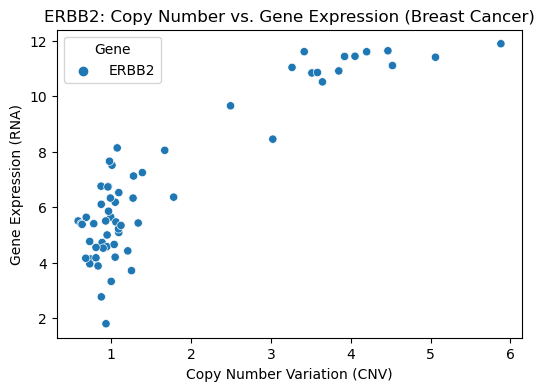

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔎 Filter for ERBB2 and MYC genes AND by a specific cancer type (e.g., Breast Cancer)
genes_of_interest = ['ERBB2', 'MYC']
df_breast = DF[(DF['Gene'].isin(genes_of_interest))&(DF['primary_disease'] == 'Breast Cancer')]

# 📊 Scatterplot: CNV vs. RNA for ERBB2 in Breast Cancer
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_breast[df_breast['Gene'] == 'ERBB2'], x='CN', y='GE', hue='Gene')
plt.title("ERBB2: Copy Number vs. Gene Expression (Breast Cancer)")
plt.xlabel("Copy Number Variation (CNV)")
plt.ylabel("Gene Expression (RNA)")
plt.show()


## 📊 2.2 Understanding ERBB2 Copy Number and Gene Expression  

Each **data point** on the resulting scatterplot represents a **cancer cell line**—a sample of cells from a specific type of cancer.  

### **📉 What Do the Axes Represent?**  
- **X-axis** ➝ **ERBB2 Copy Number (CNV)**  
  - This shows how many copies of the **ERBB2** gene are present in each cell line.  
  - A normal copy number is usually **2** (one from each parent).  
  - **Higher values** (e.g., 5, 10, 20) mean the gene is **amplified**, which is common in cancers like breast cancer.  
  - **Lower values** (e.g., 0, 1) indicate a possible **gene deletion**.  

- **Y-axis** ➝ **ERBB2 RNA Expression**  
  - This tells us how frequently the **ERBB2** gene is being transcribed into RNA.  
  - Higher expression means more **ERBB2 RNA molecules**, which often leads to **higher protein production**.  

### **🔗 How Are Gene Expression and Copy Number Related?**  
- **In many cases, copy number and gene expression are correlated**:  
  ✅ **High copy number → Higher RNA expression** (gene amplification leads to overexpression)  
  ❌ **Low copy number → Lower RNA expression** (gene loss leads to reduced expression)  

### **🚨 Why Does This Matter in Cancer?**  
- **ERBB2 (also called HER2) is a key oncogene.**  
- **Too much ERBB2 (high CNV and RNA)** → Overexpression of ERBB2 protein can drive **uncontrolled cell growth**, leading to aggressive cancers.  
- **Too little ERBB2 (low CNV and RNA)** → While less common, some cancers **lose tumor suppressor genes**, disrupting normal cell function.  

By analyzing **ERBB2 CNV vs. RNA expression**, we can explore:  
✅ **Which cancers have ERBB2 amplification?**  
✅ **How strong is the relationship between CNV and RNA levels?**  
✅ **Are there outliers that don’t follow the expected trend?**  

---
🔎 **Now, let’s visualize this relationship in our dataset!** 🚀  


## 📏 Understanding log₂ Copy Number Variation (CNV)

### 🔬 What is log₂ CNV?
In our dataset, the **copy number variation (CNV)** values are stored in **log₂ scale** instead of absolute numbers.  
This transformation makes it easier to compare across different cell lines and smooths out extreme values.  

### 📉 How Does log₂ CNV Work?
- **log₂ CNV = 0** → Normal copy number (**~2 copies**)  
- **log₂ CNV > 0** → Gene amplification (more than 2 copies)  
- **log₂ CNV < 0** → Gene loss or deletion (fewer than 2 copies)  

### 🔄 Converting log₂ CNV Back to Absolute CNV  
To **convert back to absolute CNV**, we use the formula:  

$$ |CNV| = 2^{\text{log}_2 CNV} \times 2 $$  

This scaling ensures that a **log₂ CNV of 0** corresponds to **2 absolute copies** (the diploid state in most human cells).  


## 📌 Exercise: Plotting Absolute Copy Number Variation (CNV)  

### **🔎 Try on Your Own**  

Understanding CNV in terms of the **absolute number of gene copies** (rather than log₂ CNV) provides a more intuitive biological interpretation.  

The **absolute copy number** represents the **average number of copies** of a gene (e.g., **ERBB2**) across all cells in a given cancer cell line. This value is often an **average of more than 1 million cells**, reflecting the overall CNV landscape in that population.  

By re-plotting the graph with **absolute CNV**, we can directly observe how gene amplification and deletion affect transcription.  

---

### **💡 Your Task:**  
📊 **Re-plot the scatterplot of ERBB2 Copy Number vs. RNA Expression, using absolute CNV instead of log₂ CNV.**  

- Convert **log₂ CNV** to **absolute CNV**.  
- Plot **absolute CNV** on the x-axis and **RNA expression** on the y-axis.  
- Analyze whether the relationship between CNV and RNA expression changes when using absolute values.  

---

👉 **Once you've completed your plot, reflect on the differences between using log₂ CNV and absolute CNV.** 🚀  


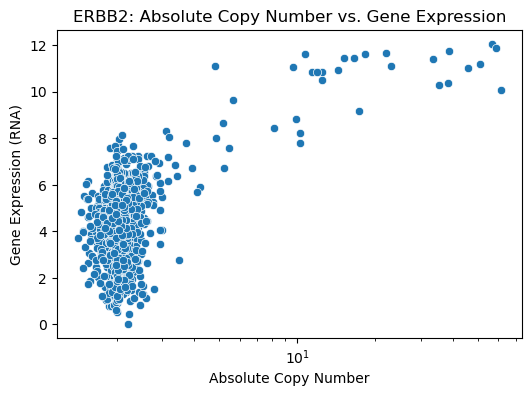

In [33]:
# 🔄 Convert log2 CNV to absolute CNV
DF["CN"] = pd.to_numeric(DF["CN"], errors="coerce")  # Convert to numeric, set errors='coerce' to handle any non-numeric values
DF["Absolute_CNV"] = 2 ** DF["CN"]

# 🔎 Filter for ERBB2
df_erbb2 = DF[DF["Gene"] == "ERBB2"]

# 📊 Scatterplot: Absolute CNV vs. RNA Expression
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_erbb2, x="Absolute_CNV", y="GE")
plt.title("ERBB2: Absolute Copy Number vs. Gene Expression")
plt.xlabel("Absolute Copy Number")
plt.ylabel("Gene Expression (RNA)")
plt.xscale("log")  # Use log scale to handle large values
plt.show()

# 3.0 Identifying High-CNV, High-RNA Cell Lines Across Cancer Types  



When analyzing **ERBB2 CNV and RNA expression across all cancer cell lines**, we see a **wide range of gene copy numbers**.  

- Some cell lines fall in the **"normal" diploid range**, meaning they have **about 2 copies** of ERBB2 per cell.  
- Others show **extremely high copy numbers**, sometimes exceeding **100 copies per cell on average!**  
- This **massive increase in gene dosage** is known as **gene amplification**, which can drive cancer progression by **overexpressing oncogenes like ERBB2.**  

### 📌 **Why does this matter?**  
- In many cancers, **high CNV leads to high RNA expression**, causing **increased production of ERBB2 protein**, which can drive **uncontrolled cell growth**.  
- Understanding which cell lines show **extreme amplification** helps us identify **potential therapeutic targets**.  

---

## **🎯 Our Goal**  
We want to **identify and separate** the:  
✅ **"Normal" cell lines** (diploid CNV, ~2 copies)  
✅ **"Amplified" cell lines** (high CNV, e.g., >10, >50, or even >100 copies)  

---

## **🔎 How Can We Do This?**  
We'll start by practicing this with **breast cancer cell lines** before applying it to other cancer types.  

👉 **Next, let's dive into the exercise and analyze breast cancer ERBB2 amplification!** 🚀  


### **💡 Step-by-Step Guide:**  
1️⃣ **Filter the dataset to include cell lines of only a specific type of cancer (e.g. breast cancer)**  
2️⃣ **Find cell lines with "normal" CNV (~2 copies).**  
3️⃣ **Find cell lines with "high amplification" (>10 copies, >50 copies, etc.).**  
4️⃣ **Compare RNA expression levels between normal and amplified cell lines.**  

---



### **💻 Example Code to Get Started**

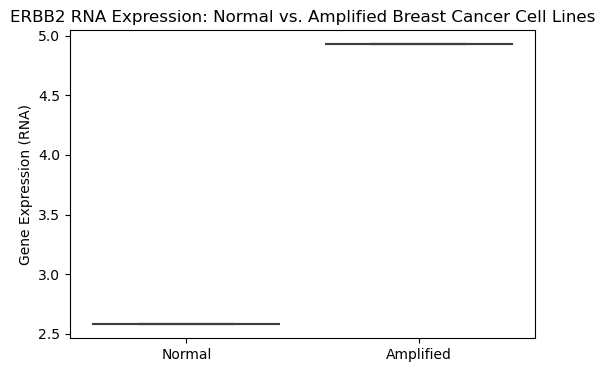

🚀 Top Amplified Breast Cancer Cell Lines:


,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease,Absolute_CNV
21667786,ACH-001819,MFM223_BREAST,RTN4IP1,6.489265,9.239837,Breast Cancer,89.838677
21669162,ACH-001819,MFM223_BREAST,QRSL1,6.489265,9.987264,Breast Cancer,89.838677
3605034,ACH-001819,MFM223_BREAST,FGFR2,6.326611,10.766446,Breast Cancer,80.260106
21666410,ACH-001819,MFM223_BREAST,CRYBG1,6.146003,7.303324,Breast Cancer,70.816000
10675852,ACH-000859,HCC1954_BREAST,GSDMA,5.880057,1.400538,Breast Cancer,58.894324
10668972,ACH-000859,HCC1954_BREAST,IKZF3,5.880057,0.985500,Breast Cancer,58.894324
10657964,ACH-000859,HCC1954_BREAST,PPP1R1B,5.880057,4.391630,Breast Cancer,58.894324
10674476,ACH-000859,HCC1954_BREAST,LRRC3C,5.880057,0.111031,Breast Cancer,58.894324
10673100,ACH-000859,HCC1954_BREAST,ORMDL3,5.880057,11.434576,Breast Cancer,58.894324
10671724,ACH-000859,HCC1954_BREAST,GSDMB,5.880057,9.237616,Breast Cancer,58.894324


In [34]:
# 🔎 Step 1: Filter for Breast Cancer Cell Lines
df_breast = DF[(DF['primary_disease'] == 'Breast Cancer')]

# 🔎 Step 2: Define Normal vs. Amplified Cell Lines
normal_cells = df_breast[df_breast["Absolute_CNV"] <= 3]  # Diploid or near-diploid
high_amp_cells = df_breast[df_breast["Absolute_CNV"] > 10]  # Strongly amplified

# 📊 Step 3: Compare RNA Expression
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df_breast, x=["Normal", "Amplified"], y=[normal_cells["GE"].mean(), high_amp_cells["GE"].mean()])
plt.title("ERBB2 RNA Expression: Normal vs. Amplified Breast Cancer Cell Lines")
plt.ylabel("Gene Expression (RNA)")
plt.show()

# 🏷 Display Top Amplified Cell Lines
print("🚀 Top Amplified Breast Cancer Cell Lines:")
display(high_amp_cells.sort_values(by="Absolute_CNV", ascending=False).head(10))

## 📌 Exercise 3.1: Highlighting Amplified Cell Lines in the ERBB2 CNV vs. RNA Scatterplot  

### **🔎 Try on Your Own**  

Now that we've identified **normal vs. amplified** cell lines based on ERBB2 CNV, let's visualize them clearly in our scatterplot!  

To do this, we will:  
1️⃣ **Color normal cell lines in blue** and **amplified cell lines in red**.  
2️⃣ **Define "amplified" as cell lines with Absolute CNV > 10**.  
3️⃣ **Plot ERBB2 CNV vs. RNA expression with the highlighted points.**  

---

### **💡 Your Task:**  
📊 **Modify the scatterplot so that amplified cell lines (Absolute CNV > 10) appear in red, while normal cell lines remain blue.**  

---


## **💻 Example Code to Get Started**

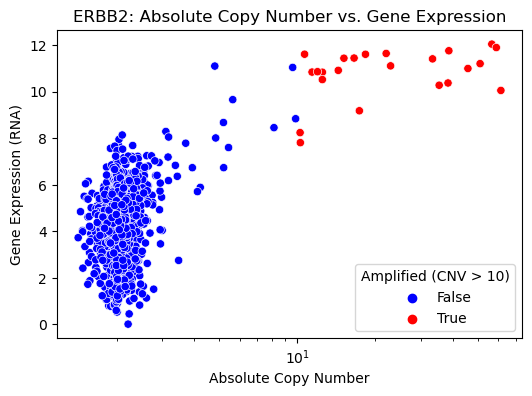

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔎 Define normal and amplified cell lines
DF["Amplified"] = DF["Absolute_CNV"] > 10  # True for CNV > 10, False otherwise

# 🔎 Filter for ERBB2 data
df_erbb2 = DF[DF["Gene"] == "ERBB2"]

# 📊 Create scatterplot with color distinction
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_erbb2, x="Absolute_CNV", y="GE", hue="Amplified", palette={True: "red", False: "blue"})
plt.title("ERBB2: Absolute Copy Number vs. Gene Expression")
plt.xlabel("Absolute Copy Number")
plt.ylabel("Gene Expression (RNA)")
plt.xscale("log")  # Use log scale for better visualization
plt.legend(title="Amplified (CNV > 10)")
plt.show()

# 4.0 Exploring RNA in high CNV cell lines

## 📌 How do we evaluate CNV and RNA simultaneously?  

### **🔬 Why Doesn't High CNV Always Mean High RNA?**  

When analyzing gene expression, we might assume that **higher copy number variation (CNV) leads to higher RNA expression**. However, this isn't always the case due to **cellular regulation mechanisms**, such as:  

- **Epigenetic regulation** 🧬 → Even with extra gene copies, chromatin modifications can **silence gene expression**.  
- **Transcriptional feedback loops** 🔄 → Cells can regulate expression to **prevent overproduction** of certain proteins.  
- **Post-transcriptional regulation** 🛠 → MicroRNAs and RNA-binding proteins can **degrade excess mRNA**, limiting translation.  
- **Protein turnover** 🔥 → Even if RNA is high, proteins may be rapidly degraded, **limiting functional impact**.  

Thus, while CNV **often correlates** with RNA expression, **exceptions exist** due to these regulatory layers.  

---

## **🎯 Setting Thresholds for "Super High" CNV and RNA**  

To explore **whether high CNV truly leads to high RNA**, we will:  

1️⃣ **Compute percentiles** to determine what counts as **"high"** CNV and RNA.  
2️⃣ **Manually set a classification column** to separate **high vs. low** CNV/RNA cases.  
3️⃣ **Visualize the relationship** between CNV and RNA expression.  

---

## **📊 Computing Percentiles for High CNV & High RNA**  
Before setting thresholds, let's **calculate the percentiles** for **ERBB2 CNV and RNA expression** across all cancer cell lines.  


In [36]:

# 🔎 Compute the 90th percentile (top 10%) for CNV and RNA Expression
cnv_threshold = np.percentile(DF[DF["Gene"] == "ERBB2"]["CN"], 99)  # CNV threshold
rna_threshold = np.percentile(DF[DF["Gene"] == "ERBB2"]["GE"], 97)  # RNA threshold

print(f"📌 CNV > {cnv_threshold:.2f} is in the top 1% of cell lines.")
print(f"📌 RNA > {rna_threshold:.2f} is in the top 3% of cell lines.")

📌 CNV > 3.96 is in the top 1% of cell lines.
📌 RNA > 7.51 is in the top 3% of cell lines.


### 4.1 Manually Labeling Cell Lines Based on CNV and RNA Expression

Now, let's add a column that categorizes cell lines based on their CNV and RNA expression levels.


In [37]:
# 🔄 Convert RNA expression to numeric
DF["GE"] = pd.to_numeric(DF["GE"], errors="coerce")  # Convert RNA to numbers

# 🏷 Label cell lines using manual thresholds  
DF["Manual"] = np.select([
                            ((DF["CN"] > cnv_threshold) & (DF["GE"] > rna_threshold)),  # High CNV & High RNA
                            ((DF["CN"] <= cnv_threshold) & (DF["GE"] > rna_threshold)), # Low CNV & High RNA
                            ((DF["CN"] <= cnv_threshold) & (DF["GE"] <= rna_threshold)) # Low CNV & Low RNA
                         ],
                         [1, 0, 2], default=3)  # Default = High CNV & Low RNA (unexpected case)


### 4.2 Visualizing CNV vs. RNA Expression in ERBB2

Now, let's plot ERBB2 Copy Number vs. RNA Expression with our manual labels.

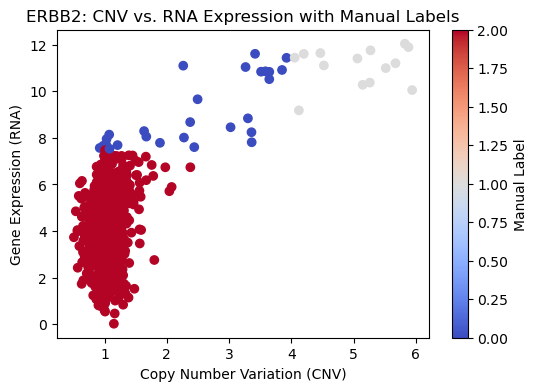

,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease,Absolute_CNV,Amplified,Manual
10664272,ACH-000277,HCC1419_BREAST,ERBB2,4.198499,11.609086,Breast Cancer,18.360060,True,1
10664385,ACH-000392,CALU3_LUNG,ERBB2,5.145790,10.279378,Lung Cancer,35.402750,True,1
10664419,ACH-000427,NCIN87_STOMACH,ERBB2,5.270205,11.760470,Gastric Cancer,38.591329,True,1
10664472,ACH-000481,NCIH2170_LUNG,ERBB2,5.671834,11.206831,Lung Cancer,50.979099,True,1
10664544,ACH-000554,UACC893_BREAST,ERBB2,4.464675,11.644172,Breast Cancer,22.080103,True,1
10664667,ACH-000679,OE19_OESOPHAGUS,ERBB2,5.822285,12.045350,Esophageal Cancer,56.582545,True,1
10664794,ACH-000809,KYSE410_OESOPHAGUS,ERBB2,5.259419,10.375365,Esophageal Cancer,38.303885,True,1
10664813,ACH-000828,ZR7530_BREAST,ERBB2,4.052316,11.446618,Breast Cancer,16.590853,True,1
10664844,ACH-000859,HCC1954_BREAST,ERBB2,5.880057,11.898639,Breast Cancer,58.894324,True,1
10664902,ACH-000917,TE4_OESOPHAGUS,ERBB2,5.515229,10.998308,Esophageal Cancer,45.735059,True,1


In [38]:
import matplotlib.pyplot as plt

# 🔎 Filter for ERBB2
erbb2_ge = DF[DF["Gene"] == "ERBB2"]

# 📊 Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(erbb2_ge["CN"], erbb2_ge["GE"], c=erbb2_ge["Manual"], cmap="coolwarm")
plt.xlabel("Copy Number Variation (CNV)")
plt.ylabel("Gene Expression (RNA)")
plt.title("ERBB2: CNV vs. RNA Expression with Manual Labels")
plt.colorbar(label="Manual Label")
plt.show()

# 🏷 Display top amplified cases
display(erbb2_ge[erbb2_ge["Manual"] == 1])


## 📌 Exercise 4.2.1: Does High CNV Always Mean High RNA?  

### **🔎 Try on Your Own**  

Now that we've manually labeled **high-CNV and high-RNA cases**, let's **test whether CNV consistently leads to increased RNA expression**.  

### **🎯 Your Task:**  

📊 **Investigate ERBB2 expression patterns based on CNV status.**  

1️⃣ **How many cell lines have high CNV but do NOT show high RNA?**  
2️⃣ **How many cell lines have low CNV but show high RNA?**  
3️⃣ **Are there specific cancer types where CNV and RNA are more tightly linked?**  

---

## **💻 Example Code to Get Started**

In [39]:
high_cnv_low_rna = DF[(DF["Gene"] == "ERBB2") & (DF["Manual"] == 3)].shape[0]
low_cnv_high_rna = DF[(DF["Gene"] == "ERBB2") & (DF["Manual"] == 0)].shape[0]

print(f"🔍 {high_cnv_low_rna} cell lines have high CNV but low RNA.")
print(f"🔍 {low_cnv_high_rna} cell lines have low CNV but high RNA.")


🔍 0 cell lines have high CNV but low RNA.
🔍 28 cell lines have low CNV but high RNA.


## 📌 Exercise 4.2.2: Investigating MYC – Does High CNV Always Mean High RNA?  

### **🔎 Try on Your Own**  

Now that we've examined **ERBB2**, let's apply the same approach to another key oncogene: **MYC**.  

**MYC** is a well-known gene involved in **cell cycle regulation, growth, and proliferation**. It is frequently **amplified in multiple cancer types**, but just like ERBB2, **high CNV does not always equate to high RNA expression.**  

Your goal is to determine **whether MYC amplification follows the expected pattern of high RNA expression or if regulatory mechanisms suppress its transcription.**  

---

### **🎯 Your Task:**  

📊 **Investigate MYC expression patterns based on CNV status.**  

1️⃣ **How many cell lines have high CNV but do NOT show high RNA for MYC?**  
2️⃣ **How many cell lines have low CNV but show high RNA for MYC?**  
3️⃣ **Are there specific cancer types where MYC CNV and RNA are more tightly linked?**  

---

## **💻 Example Code to Get Started**

📌 MYC CNV > 5.15 is in the top 1% of cell lines.
📌 MYC RNA > 9.01 is in the top 3% of cell lines.
🔍 6 cell lines have high MYC CNV but low RNA.
🔍 34 cell lines have low MYC CNV but high RNA.


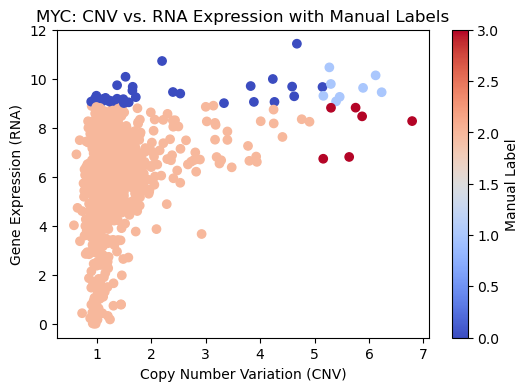

In [40]:

# 🔎 Compute MYC-specific percentiles for CNV and RNA Expression
cnv_threshold_myc = np.percentile(DF[DF["Gene"] == "MYC"]["CN"], 99)  # CNV threshold for MYC
rna_threshold_myc = np.percentile(DF[DF["Gene"] == "MYC"]["GE"], 97)  # RNA threshold for MYC

print(f"📌 MYC CNV > {cnv_threshold_myc:.2f} is in the top 1% of cell lines.")
print(f"📌 MYC RNA > {rna_threshold_myc:.2f} is in the top 3% of cell lines.")

# 🏷 Label MYC cell lines using manual thresholds  
DF["MYC_Manual"] = np.select([
                            ((DF["Gene"] == "MYC") & (DF["CN"] > cnv_threshold_myc) & (DF["GE"] > rna_threshold_myc)),  # High CNV & High RNA
                            ((DF["Gene"] == "MYC") & (DF["CN"] <= cnv_threshold_myc) & (DF["GE"] > rna_threshold_myc)), # Low CNV & High RNA
                            ((DF["Gene"] == "MYC") & (DF["CN"] <= cnv_threshold_myc) & (DF["GE"] <= rna_threshold_myc)) # Low CNV & Low RNA
                         ],
                         [1, 0, 2], default=3)  # Default = High CNV & Low RNA (unexpected case)

# 🔎 Count MYC cell lines in each category
high_cnv_low_rna_myc = DF[(DF["Gene"] == "MYC") & (DF["MYC_Manual"] == 3)].shape[0]
low_cnv_high_rna_myc = DF[(DF["Gene"] == "MYC") & (DF["MYC_Manual"] == 0)].shape[0]

print(f"🔍 {high_cnv_low_rna_myc} cell lines have high MYC CNV but low RNA.")
print(f"🔍 {low_cnv_high_rna_myc} cell lines have low MYC CNV but high RNA.")

# 📊 Scatter plot for MYC
plt.figure(figsize=(6,4))
myc_ge = DF[DF["Gene"] == "MYC"]
plt.scatter(myc_ge["CN"], myc_ge["GE"], c=myc_ge["MYC_Manual"], cmap="coolwarm")
plt.xlabel("Copy Number Variation (CNV)")
plt.ylabel("Gene Expression (RNA)")
plt.title("MYC: CNV vs. RNA Expression with Manual Labels")
plt.colorbar(label="Manual Label")
plt.show()

## 📌 Assignment 1: Investigating MYC Regulation  

### **🔬 Discussion & Analysis**  

Now that you have explored the relationship between **MYC CNV and RNA expression**, answer the following questions using both your observations and biological reasoning.  

### **📝 Your Task:**  

1️⃣ **Compare MYC to ERBB2**:  
   - How does MYC compare to ERBB2 in terms of **copy number variation (CNV) and RNA expression correlation**?  
   - Is MYC amplification more or less predictive of high RNA expression than ERBB2?  

2️⃣ **Cancer Type-Specific Trends**:  
   - Are there specific cancer types where **MYC CNV does NOT predict RNA expression**?  
   - Use your dataset to find examples of cell lines with **high MYC CNV but low RNA expression**.  

3️⃣ **Regulatory Differences Between MYC and ERBB2**:  
   - What factors might contribute to **differences in regulation** between MYC and ERBB2?  
   - Consider **epigenetics, transcriptional regulation, and post-transcriptional mechanisms**.  

---

## **🎯 Extended Challenge**  

📊 **Expand your analysis to other oncogenes** to see if the trends you observed for MYC and ERBB2 apply elsewhere.  

**🔍 Select at least three of the following oncogenes and repeat the CNV vs. RNA analysis:**  

✅ **EGFR** (frequently amplified in lung cancer)  
✅ **FGFR2** (important in gastric and breast cancer)  
✅ **TP53** (tumor suppressor with complex regulation)  
✅ **EZH2** (epigenetic regulator; altered in lymphomas)  
✅ **KRAS** (oncogene driving pancreatic, lung, and colorectal cancers)  

---

### **📢 Instructions on Dissemination Analysis:**  
🔹 **Summarize your findings** in a short paragraph for each question.  

🔹 **Include visual evidence** such as **scatterplots** or **statistical insights** to support your answers.  

🔹 **Discuss unexpected findings** or trends that differ from expectations.  

🔹 **Make hypotheses about gene regulation** based on your findings for each case.   


# Section 6.0: Identifying Co-Amplification Genes on Extrachromosomal DNA



### **🔬 Introduction to Extrachromosomal DNA (ecDNA)**  

In most cells, **DNA is organized into chromosomes**, and genes follow a **linear arrangement** along them. However, in many cancers, some genes become **amplified on extrachromosomal DNA (ecDNA)**—**small, circular pieces of DNA separate from chromosomes**.  

🔬 **Why is ecDNA important in cancer?**  
- Unlike chromosomal amplification, **ecDNA allows rapid gene copy number expansion**, contributing to **drug resistance and aggressive cancer growth**.  
- **ecDNA is inherited unequally** between daughter cells, leading to **high genetic variability within tumors**.  
- Some of the most well-known oncogenes, such as **ERBB2, MYC, and EGFR**, are frequently **co-amplified on ecDNA** in different cancers.  

### **🎯 Your Goal**  

In this section, we will:  
✅ **Find genes that are co-amplified with ERBB2 and MYC** in the **NCIH2170_LUNG** cell line.  
✅ **Use the `genome.csv` file** to examine genes located near ERBB2 and MYC that might also be co-amplified.  
✅ **Understand how ecDNA amplifications differ from chromosomal amplifications.**  

---

## **📊 Step 1: Locate Co-Amplified Genes in NCIH2170_LUNG**  

First, let's identify genes that have **high CNV in the NCIH2170_LUNG cell line**, similar to **ERBB2 and MYC**.  

In [41]:
# 🔎 Filter for the NCIH2170_LUNG cell line
cell_line = "NCIH2170_LUNG"
df_ncih2170 = DF[(DF["CCLE_Name"] == cell_line) & (DF["CN"] > 4)]  # CNV > 4 threshold

# 📊 Display the top amplified genes
df_ncih2170.sort_values(by="CN", ascending=False).head(10)

,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease,Absolute_CNV,Amplified,Manual,MYC_Manual
24018552,ACH-000481,NCIH2170_LUNG,MYC,6.792398,8.284385,Lung Cancer,110.844818,True,1,3
10686488,ACH-000481,NCIH2170_LUNG,RAPGEFL1,5.774180,6.874059,Lung Cancer,54.726986,True,3,3
10687864,ACH-000481,NCIH2170_LUNG,WIPF2,5.774180,6.960118,Lung Cancer,54.726986,True,3,3
10689240,ACH-000481,NCIH2170_LUNG,CDC6,5.774180,11.871251,Lung Cancer,54.726986,True,1,3
10660344,ACH-000481,NCIH2170_LUNG,TCAP,5.671834,6.649615,Lung Cancer,50.979099,True,3,3
10661720,ACH-000481,NCIH2170_LUNG,PNMT,5.671834,5.728193,Lung Cancer,50.979099,True,3,3
10663096,ACH-000481,NCIH2170_LUNG,PGAP3,5.671834,9.147968,Lung Cancer,50.979099,True,1,3
10664472,ACH-000481,NCIH2170_LUNG,ERBB2,5.671834,11.206831,Lung Cancer,50.979099,True,1,3
10665848,ACH-000481,NCIH2170_LUNG,MIEN1,5.671834,11.247037,Lung Cancer,50.979099,True,1,3
10667224,ACH-000481,NCIH2170_LUNG,GRB7,5.671834,8.185024,Lung Cancer,50.979099,True,1,3


## **📊 Step 2: Use genome.csv to Find Nearby Genes  

Next, let’s examine whether the amplified genes are located near each other in the genome, which may suggest co-amplification on ecDNA.

## 📌 Exercise 6.1: Finding Co-Amplified Genes in NCIH2170_LUNG  

### **🔎 Try on Your Own**  

Now that we have identified genes **highly amplified** in **NCIH2170_LUNG**, let’s take it a step further and investigate potential **co-amplification on extrachromosomal DNA (ecDNA).**  

---

### **📝 Your Task:**  

1️⃣ **Find all genes with CNV > 4** in the **NCIH2170_LUNG** cell line.  

2️⃣ **Identify which of these genes are on the same chromosome** as **ERBB2** and **MYC**.  

3️⃣ **Compare their chromosomal locations**:  
   - Are these genes **clustered together** in the genome?  
   - Or are they **spread far apart**, suggesting different amplification mechanisms? How many "fragments" do you expect are in the ecDNA?  

4️⃣ **Make a hypothesis**:  
   - Based on their locations, **which genes do you think might be co-amplified on ecDNA?**  


In [25]:
# 🔎 Step 1: Filter for genes with CNV > 4 in NCIH2170_LUNG
df_high_amp = DF[(DF["CCLE_Name"] == "NCIH2170_LUNG") & (DF["CN"] > 4)]

# 🔎 Step 2: Get chromosomal locations from genome.csv
df_high_amp_genome = genome[genome["symbol"].isin(df_high_amp["Gene"])][["symbol", "#chrom", "chromStart", "chromEnd"]]

# 📊 Display results
df_high_amp_genome.sort_values(by=["#chrom", "chromStart"]).head(15)


,symbol,#chrom,chromStart,chromEnd
35333,TCAP,chr17,39665348,39666553
35334,PNMT,chr17,39668018,39670474
35335,PGAP3,chr17,39671121,39688056
35336,ERBB2,chr17,39688093,39728657
35338,MIEN1,chr17,39728509,39730531
35339,GRB7,chr17,39737937,39747284
35340,IKZF3,chr17,39757714,39864311
35343,ZPBP2,chr17,39868201,39877895
35356,CASC3,chr17,40140536,40172170
35358,RAPGEFL1,chr17,40177009,40195649


## 📌 Exercise 6.2: Merging Co-Amplified Genes with Genome, CNV & RNA Data  

### **🔎 Try on Your Own**  

Now that you've identified genes **co-amplified** with **ERBB2 and MYC** in the **NCIH2170_LUNG** cell line, let's investigate how their **copy number variation (CNV) compares across all cell lines**.  

To do this, you will **merge your identified co-amplified genes** with the **original CNV and RNA expression dataset**.  

---

### **📝 Your Task:**  

1️⃣ **Merge the co-amplified genes** from Exercise 6.1 with the original **CNV and RNA expression dataset** (`DF`).  

2️⃣ **Compare CNV differences** across the highly amplified genes in NCIH2170:  
   - Do these genes share the same copy number level amplification?   
   - What would you hypothesize, given there can be different ecDNAs with different genes amplified, for any differences in CNV?   

3️⃣ **Visualize CNV vs RNA levels** for these co-amplified genes across all highly amplified genes:  
   - Use graphical analyses to show the relationship between CNV and RNA for all genes in this subset. What relationships do you see?  

---


In [26]:
# 🔗 Merge genomic data with CNV, RNA, and primary disease info
df_merged_full = df_high_amp_genome.merge(
    df_high_amp,  # The main dataset with CNV, RNA, and primary disease
    left_on="symbol",  # Column in df_high_amp_genome containing gene names
    right_on="Gene",  # Column in DF containing gene names
    how="left"  # Keep all genes from df_high_amp_genome, even if not found in DF
)

# 🔄 Sorting by chromosome and start position
df_merged_full = df_merged_full.sort_values(by=["#chrom", "chromStart"])

# 🔍 Display the first 15 rows
display(df_merged_full.head(15))


,symbol,#chrom,chromStart,chromEnd,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease,Absolute_CNV,Amplified,Manual,MYC_Manual
2,TCAP,chr17,39665348,39666553,ACH-000481,NCIH2170_LUNG,TCAP,5.671834,6.649615,Lung Cancer,50.979099,True,3,3
3,PNMT,chr17,39668018,39670474,ACH-000481,NCIH2170_LUNG,PNMT,5.671834,5.728193,Lung Cancer,50.979099,True,3,3
4,PGAP3,chr17,39671121,39688056,ACH-000481,NCIH2170_LUNG,PGAP3,5.671834,9.147968,Lung Cancer,50.979099,True,1,3
5,ERBB2,chr17,39688093,39728657,ACH-000481,NCIH2170_LUNG,ERBB2,5.671834,11.206831,Lung Cancer,50.979099,True,1,3
6,MIEN1,chr17,39728509,39730531,ACH-000481,NCIH2170_LUNG,MIEN1,5.671834,11.247037,Lung Cancer,50.979099,True,1,3
7,GRB7,chr17,39737937,39747284,ACH-000481,NCIH2170_LUNG,GRB7,5.671834,8.185024,Lung Cancer,50.979099,True,1,3
8,IKZF3,chr17,39757714,39864311,ACH-000481,NCIH2170_LUNG,IKZF3,5.671834,2.176323,Lung Cancer,50.979099,True,3,3
9,ZPBP2,chr17,39868201,39877895,ACH-000481,NCIH2170_LUNG,ZPBP2,5.671834,1.516015,Lung Cancer,50.979099,True,3,3
10,CASC3,chr17,40140536,40172170,ACH-000481,NCIH2170_LUNG,CASC3,5.247701,5.623223,Lung Cancer,37.994025,True,3,3
11,RAPGEFL1,chr17,40177009,40195649,ACH-000481,NCIH2170_LUNG,RAPGEFL1,5.774180,6.874059,Lung Cancer,54.726986,True,3,3


## 📌 Assignment: Identifying Cell Lines with Fragmented Gene Amplifications  

### **🔎 Background**  

Some cell lines—such as **NCIH2170**—exhibit ecDNA or **fragmented gene amplifications**, where only **a subset of genes** are co-amplified instead of entire chromosomal regions.   

In this final assignment, you will:  
1️⃣ **Identify other cell lines** with similar fragmented co-amplifications.  
2️⃣ **Find the genes that are co-amplified** in these cases.  
3️⃣ **Determine their chromosomal locations** to check if they are near each other.  
4️⃣ **Analyze RNA expression levels** of these genes across different cancers.  
5️⃣ **Classify which cancer types** tend to exhibit this type of amplification.  
6️⃣ **Validate predictions** using **Cytocelldb**: [cytocelldb.unc.edu](https://cytocelldb.unc.edu/)  

---

## **📝 Your Task:**  

### **Step 1: Identify Fragmented Amplifications in Other Cell Lines**  
🔹 Find all **cell lines that exhibit high CNV (>4) in only a subset of genes**.  
🔹 Determine **which genes are amplified** and **on which chromosomes**.  
🔹 Compare their pattern to **NCIH2170** to find similarities.  

---

### **Step 2: Investigate RNA Expression of Co-Amplified Genes**  
🔹 Do **high CNV levels translate into high RNA expression** for these genes?  
🔹 Are there **genes that remain transcriptionally silent** despite high CNV?  

---

### **Step 3: Determine Cancer Types Associated with These Amplifications**  
🔹 Which cancer types tend to show this **fragmented gene amplification pattern**?  
🔹 Are these amplifications **more common in specific tumor types** (e.g., lung, breast, brain)?  

---

### 


__________________. Extra help for students 

In [27]:
# Using IPython.display, we can modify the appearance of the Jupyter Notebook layout to better fit the content on the screen.

#This snippet adjusts the width of the notebook container, menu bar, and toolbar for a better viewing experience.

from IPython.display import clear_output
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# Import necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle

pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.max_rows', None)

In [44]:
subset = DF[DF.primary_disease=='Breast Cancer']
subset.head(2)

,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease,Absolute_CNV,Amplified,Manual,MYC_Manual
15,ACH-000017,SKBR3_BREAST,OR4F5,1.201170,0.0,Breast Cancer,2.299260,False,2,3
17,ACH-000019,MCF7_BREAST,OR4F5,0.823326,0.0,Breast Cancer,1.769481,False,2,3


In [46]:
subset.to_csv('CCLE_CN_Breast_cancer_subset.csv')

In [29]:
subset.head(2)

,DepMap_ID,CCLE_Name,Gene,CN,GE,primary_disease,Absolute_CNV,Amplified,Manual,MYC_Manual,ERBB2_Manual,CCNE1_Manual


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set your gene of interest here
gene = "ERBB2"

# 🔎 Subset DF to the specific gene and primary disease = 'Breast Cancer'
subset = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer")]

# 🔎 Compute thresholds for CNV and RNA expression
cnv_threshold = np.percentile(subset["CN"], 99)
rna_threshold = np.percentile(subset["GE"], 97)

print(f"📌 {gene} CNV > {cnv_threshold:.2f} is in the top 1% of Breast Cancer cell lines.")
print(f"📌 {gene} RNA > {rna_threshold:.2f} is in the top 3% of Breast Cancer cell lines.")

# 🏷 Label cell lines using manual thresholds
label_conditions = [
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] > cnv_threshold) & (DF["GE"] > rna_threshold),  # High CNV & High RNA
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] <= cnv_threshold) & (DF["GE"] > rna_threshold), # Low CNV & High RNA
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] <= cnv_threshold) & (DF["GE"] <= rna_threshold) # Low CNV & Low RNA
]

label_values = [1, 0, 2]  # 1 = high-high, 0 = low-high, 2 = low-low
DF[f"{gene}_Manual"] = np.select(label_conditions, label_values, default=3)  # 3 = high CNV, low RNA (unexpected)

# 🔎 Count labeled groups
high_cnv_low_rna = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF[f"{gene}_Manual"] == 3)].shape[0]
low_cnv_high_rna = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF[f"{gene}_Manual"] == 0)].shape[0]

print(f"🔍 {high_cnv_low_rna} Breast Cancer cell lines have high {gene} CNV but low RNA.")
print(f"🔍 {low_cnv_high_rna} Breast Cancer cell lines have low {gene} CNV but high RNA.")

# 📊 Scatter plot for the selected gene
plt.figure(figsize=(6,4))
subset_plot = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer")]
plt.scatter(subset_plot["CN"], subset_plot["GE"], c=subset_plot[f"{gene}_Manual"], cmap="coolwarm")
plt.xlabel("Copy Number Variation (CNV)")
plt.ylabel("Gene Expression (RNA)")
plt.title(f"{gene}: CNV vs. RNA Expression (Breast Cancer Only)")
plt.colorbar(label="Manual Label")
plt.show()


IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
# 🔎 Subset DF to the specific gene and primary disease = 'Breast Cancer'
subset = DF[(DF["primary_disease"] == "Breast Cancer")]

DF_CN_high_genes = subset[subset.CN>4].Gene.unique().tolist()
DF_RNA_high_genes = subset[subset.GE>8].Gene.unique().tolist()
    
high_gene_list = [i for i in DF_CN_high_genes if i in DF_RNA_high_genes]  

high_gene_list
    
    #high_gene_list.append(gene)

   # print(f"📌 {gene} CNV > {cnv_threshold:.2f} is in the top 1% of Breast Cancer cell lines.")
  #  print(f"📌 {gene} RNA > {rna_threshold:.2f} is in the top 3% of Breast Cancer cell lines.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set your gene of interest here
gene = "CCNE1"

# 🔎 Subset DF to the specific gene and primary disease = 'Breast Cancer'
subset = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer")]

# 🔎 Compute thresholds for CNV and RNA expression
cnv_threshold = np.percentile(subset["CN"], 99)
rna_threshold = np.percentile(subset["GE"], 97)

print(f"📌 {gene} CNV > {cnv_threshold:.2f} is in the top 1% of Breast Cancer cell lines.")
print(f"📌 {gene} RNA > {rna_threshold:.2f} is in the top 3% of Breast Cancer cell lines.")

# 🏷 Label cell lines using manual thresholds
label_conditions = [
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] > cnv_threshold) & (DF["GE"] > rna_threshold),  # High CNV & High RNA
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] <= cnv_threshold) & (DF["GE"] > rna_threshold), # Low CNV & High RNA
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] <= cnv_threshold) & (DF["GE"] <= rna_threshold) # Low CNV & Low RNA
]

label_values = [1, 0, 2]  # 1 = high-high, 0 = low-high, 2 = low-low
DF[f"{gene}_Manual"] = np.select(label_conditions, label_values, default=3)  # 3 = high CNV, low RNA (unexpected)

# 🔎 Count labeled groups
high_cnv_low_rna = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF[f"{gene}_Manual"] == 3)].shape[0]
low_cnv_high_rna = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF[f"{gene}_Manual"] == 0)].shape[0]

print(f"🔍 {high_cnv_low_rna} Breast Cancer cell lines have high {gene} CNV but low RNA.")
print(f"🔍 {low_cnv_high_rna} Breast Cancer cell lines have low {gene} CNV but high RNA.")

# 📊 Scatter plot for the selected gene
plt.figure(figsize=(6,4))
subset_plot = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer")]
plt.scatter(subset_plot["CN"], subset_plot["GE"], c=subset_plot[f"{gene}_Manual"], cmap="coolwarm")
plt.xlabel("Copy Number Variation (CNV)")
plt.ylabel("Gene Expression (RNA)")
plt.title(f"{gene}: CNV vs. RNA Expression (Breast Cancer Only)")
plt.colorbar(label="Manual Label")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set your gene of interest here
gene = "WIPF2"

# 🔎 Subset DF to the specific gene and primary disease = 'Breast Cancer'
subset = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer")]

# 🔎 Compute thresholds for CNV and RNA expression
cnv_threshold = np.percentile(subset["CN"], 99)
rna_threshold = np.percentile(subset["GE"], 97)

print(f"📌 {gene} CNV > {cnv_threshold:.2f} is in the top 1% of Breast Cancer cell lines.")
print(f"📌 {gene} RNA > {rna_threshold:.2f} is in the top 3% of Breast Cancer cell lines.")

# 🏷 Label cell lines using manual thresholds
label_conditions = [
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] > cnv_threshold) & (DF["GE"] > rna_threshold),  # High CNV & High RNA
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] <= cnv_threshold) & (DF["GE"] > rna_threshold), # Low CNV & High RNA
    (DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF["CN"] <= cnv_threshold) & (DF["GE"] <= rna_threshold) # Low CNV & Low RNA
]

label_values = [1, 0, 2]  # 1 = high-high, 0 = low-high, 2 = low-low
DF[f"{gene}_Manual"] = np.select(label_conditions, label_values, default=3)  # 3 = high CNV, low RNA (unexpected)

# 🔎 Count labeled groups
high_cnv_low_rna = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF[f"{gene}_Manual"] == 3)].shape[0]
low_cnv_high_rna = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer") & (DF[f"{gene}_Manual"] == 0)].shape[0]

print(f"🔍 {high_cnv_low_rna} Breast Cancer cell lines have high {gene} CNV but low RNA.")
print(f"🔍 {low_cnv_high_rna} Breast Cancer cell lines have low {gene} CNV but high RNA.")

# 📊 Scatter plot for the selected gene
plt.figure(figsize=(6,4))
subset_plot = DF[(DF["Gene"] == gene) & (DF["primary_disease"] == "Breast Cancer")]
plt.scatter(subset_plot["CN"], subset_plot["GE"], c=subset_plot[f"{gene}_Manual"], cmap="coolwarm")
plt.xlabel("Copy Number Variation (CNV)")
plt.ylabel("Gene Expression (RNA)")
plt.title(f"{gene}: CNV vs. RNA Expression (Breast Cancer Only)")
plt.colorbar(label="Manual Label")
plt.show()
